## Exercise C

In [78]:
import pypesto
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def dxdt(t, v):
    return [- params[0] * v[0] + params[1] * v[1],  params[0] * v[0] -  params[1] * v[1]]

In [61]:
xM = range(0, 11)
yM = [0.0244, 0.0842, 0.1208, 0.1724, 0.2315, 0.2634, 0.2831, 0.3084, 0.3079, 0.3097, 0.3324]

In [62]:
# Start point interval
interval = [10e-3, 10]

### Loading objective function

In [23]:
from IPython.display import display, clear_output

def x_val(p):
    global params
    params = p
    sol = sci.solve_ivp(dxdt, t_span=[0, 10], y0 = [1, 0], t_eval=t)
    return sol.y[1,:]
    
def objective_c(p):
    clear_output(wait=True)
    display(p)
    t = np.linspace(0, 10, 11)
    sigma = 0.015**2
    psum = 0
    for i in range(0, 11):
        psum += ((yM[i] - x_val(p)[i])/sigma)**2 
    return psum

In [88]:
obj = pypesto.Objective(fun=objective_c)

In [89]:
lb = [interval[0], interval[0]]
ub = [interval[1], interval[1]]
probl = pypesto.Problem(obj, lb=lb, ub=ub)

### Optimize

In [103]:
optimizer = pypesto.ScipyOptimizer()
optimizer.options = {'maxiter': 50, 'disp': True}
optimizer.startpoint_method = 'uniform'
optimizer.n_starts = 1

In [104]:
run_array = []
for i in range(0, 50):
    run_array.append(pypesto.minimize(problem = probl, 
                           optimizer = optimizer,
                           n_starts = 1))

array([2.42320673, 7.6193128 ])

### Plotting

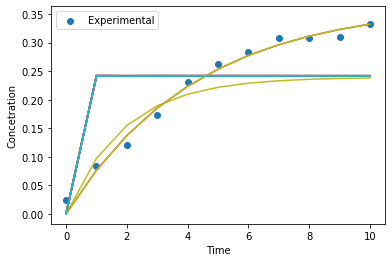

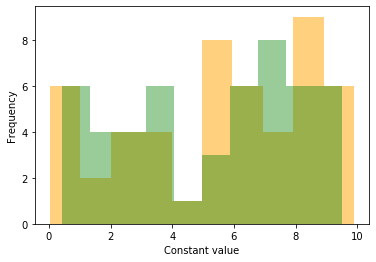

In [111]:
k1 = [] # k1
k2 = [] # k-1

plt.scatter(t, yM, label="Experimental")
for i in range(0, 50):
    resData = run_array[i].optimize_result.as_dataframe()
    y_axis = x_val([resData['x'][0][0], resData['x'][0][1]])
    # print("Parameters: ", [resData['x'][0][0], resData['x'][0][1]])
    k1.append(resData['x0'][0][0])
    k2.append(resData['x0'][0][1])
    plt.plot(t, y_axis)

plt.xlabel("Time")
plt.ylabel("Concetration")
plt.legend()
plt.show()

plt.hist(k1, color="orange", alpha=0.5)
plt.hist(k2, color="green", alpha=0.4)
plt.xlabel("Constant value")
plt.ylabel("Frequency")
plt.show()

Starting points are somewhat uniformly distributed, for a small sample ( n=50).

Only one parameter set managed to find a suitable minima. ( Yellow points )
